In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/income2022f/train_final.csv
/kaggle/input/income2022f/test_final.csv


In [79]:
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

In [80]:
! cd /kaggle/working

In [81]:
! ls -l

total 180
---------- 1 root root    263 Dec 20 05:22 __notebook_source__.ipynb
-rw-r--r-- 1 root root 179644 Dec 20 05:34 submission_dl_up.csv


In [82]:
train_data = pd.read_csv("/kaggle/input/income2022f/train_final.csv")
test_data = pd.read_csv("/kaggle/input/income2022f/test_final.csv")

In [83]:
train_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0,0,40,Vietnam,0
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,Private,83451,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,0
24996,64,Local-gov,202738,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States,0
24997,39,Private,225544,Masters,14,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,Poland,0
24998,53,Private,346871,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Male,4787,0,46,United-States,1


In [84]:
test_data

,ID,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,1,33,Self-emp-not-inc,222162,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
1,2,68,?,29240,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,0,12,United-States
2,3,34,Private,103596,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States
3,4,57,Private,103403,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
4,5,48,Private,152915,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23837,23838,26,Private,43408,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
23838,23839,27,Private,116372,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
23839,23840,67,Self-emp-inc,182581,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,20,United-States
23840,23841,46,Local-gov,274689,Assoc-acdm,12,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States


In [85]:
train_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income>50K         int64
dtype: object

In [86]:

train_data.columns
label = train_data.columns[-1]
print("Label name: ", label)


Label name:  income>50K


In [87]:
train_data = train_data.replace("?", np.NaN)
test_data = test_data.replace("?", np.NaN)
train_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0,0,40,Vietnam,0
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,Private,83451,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,0
24996,64,Local-gov,202738,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States,0
24997,39,Private,225544,Masters,14,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,Poland,0
24998,53,Private,346871,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Male,4787,0,46,United-States,1


In [88]:
#Save the 'Id' column
train_labels = train_data[label]
test_ids = test_data["ID"]

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
test_data.drop("ID", axis = 1, inplace = True)


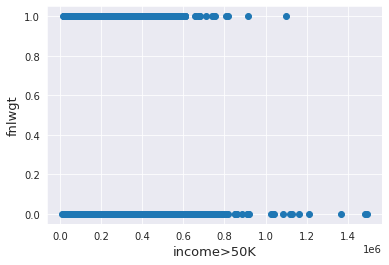

In [89]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['fnlwgt'], y = train_data[label])
plt.ylabel('fnlwgt', fontsize=13)
plt.xlabel(label, fontsize=13)
plt.show()

In [90]:
ntrain = train_data.shape[0]
ntest = test_data.shape[0]
y_train = train_labels
all_data = pd.concat((train_data, test_data)).reset_index(drop=True)
all_data.drop([label], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (48842, 14)


In [91]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
occupation,5.751198
workclass,5.730724
native.country,1.754637


Text(0.5, 1.0, 'Percent missing data by feature')

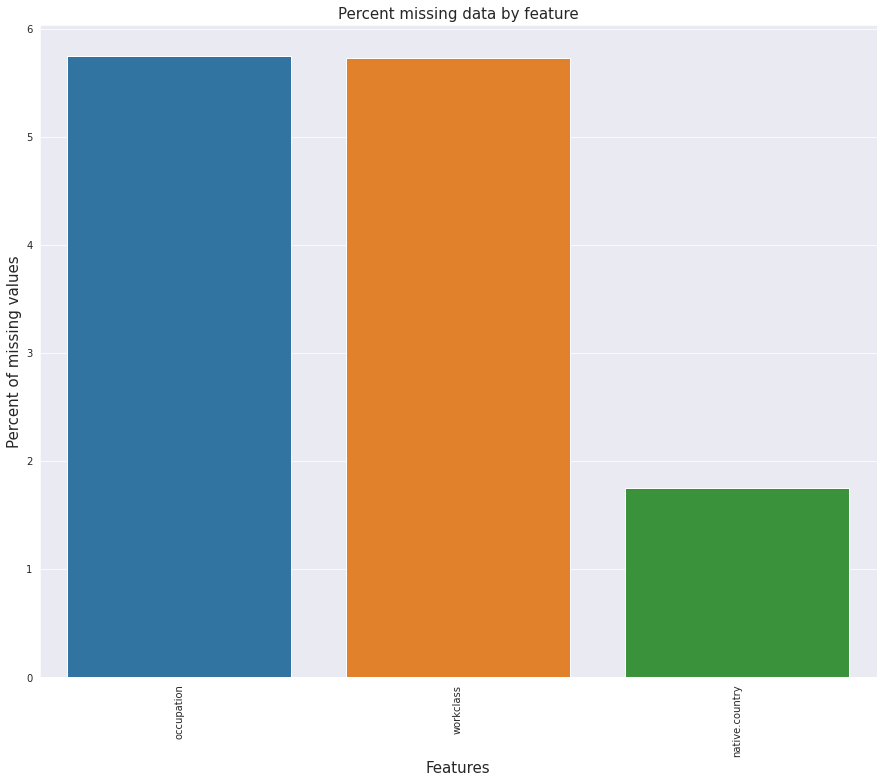

In [92]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [93]:
string_categorical_columns = [
    "workclass", "education", "marital.status", "occupation", "relationship",
    "race", "sex", "native.country"
]
missing_value_columns = [
    "workclass", "occupation", "native.country"
]
values = {
    "workclass": ["Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", "Local-gov", "State-gov", "Without-pay", "Never-worked"],
    "education": ["Bachelors", "Some-college", "11th", "HS-grad", "Prof-school", "Assoc-acdm", "Assoc-voc", "9th", "7th-8th", "12th", "Masters", "1st-4th", "10th", "Doctorate", "5th-6th", "Preschool"],
    "marital.status": ["Married-civ-spouse", "Divorced", "Never-married", "Separated", "Widowed", "Married-spouse-absent", "Married-AF-spouse"],
    "occupation": ["Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct", "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv", "Armed-Forces"],
    "relationship": ["Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", "Unmarried"],
    "race": ["White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other", "Black"],
    "sex": ["Female", "Male"],
    "native.country": ["United-States", "Cambodia", "England", "Puerto-Rico", "Canada", "Germany", "Outlying-US(Guam-USVI-etc)", "India", "Japan", "Greece", "South", "China", "Cuba", "Iran", "Honduras", "Philippines", "Italy", "Poland", "Jamaica", "Vietnam", "Mexico", "Portugal", "Ireland", "France", "Dominican-Republic", "Laos", "Ecuador", "Taiwan", "Haiti", "Columbia", "Hungary", "Guatemala", "Nicaragua", "Scotland", "Thailand", "Yugoslavia", "El-Salvador", "Trinadad&Tobago", "Peru", "Hong", "Holand-Netherlands"]
}

for column in string_categorical_columns:
    all_data[column] = all_data[column].apply(lambda row: values[column].index(row) if row in values[column] else np.NaN).astype(float)
    train_data[column] = train_data[column].apply(lambda row: values[column].index(row) if row in values[column] else np.NaN).astype(float)
    
for column in missing_value_columns:
    all_data[column] = all_data[column].fillna(all_data[column].median())
    train_data[column] = train_data[column].fillna(train_data[column].median())


    


In [94]:
all_data = all_data.astype(float)

In [95]:
all_data.dtypes

age               float64
workclass         float64
fnlwgt            float64
education         float64
education.num     float64
marital.status    float64
occupation        float64
relationship      float64
race              float64
sex               float64
capital.gain      float64
capital.loss      float64
hours.per.week    float64
native.country    float64
dtype: object

In [96]:
all_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,53.0,1.0,93449.0,4.0,15.0,0.0,5.0,2.0,1.0,1.0,0.0,0.0,40.0,7.0
1,33.0,1.0,123424.0,0.0,13.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,40.0,0.0
2,47.0,0.0,144844.0,3.0,9.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,40.0,0.0
3,40.0,0.0,114580.0,3.0,9.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,40.0,19.0
4,39.0,0.0,115618.0,3.0,9.0,0.0,10.0,2.0,0.0,1.0,0.0,0.0,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,26.0,0.0,43408.0,0.0,13.0,0.0,5.0,2.0,0.0,1.0,0.0,0.0,40.0,0.0
48838,27.0,0.0,116372.0,0.0,13.0,2.0,5.0,3.0,0.0,0.0,0.0,0.0,40.0,0.0
48839,67.0,2.0,182581.0,1.0,10.0,0.0,4.0,2.0,0.0,1.0,20051.0,0.0,20.0,0.0
48840,46.0,4.0,274689.0,5.0,12.0,1.0,12.0,3.0,0.0,1.0,0.0,0.0,40.0,0.0


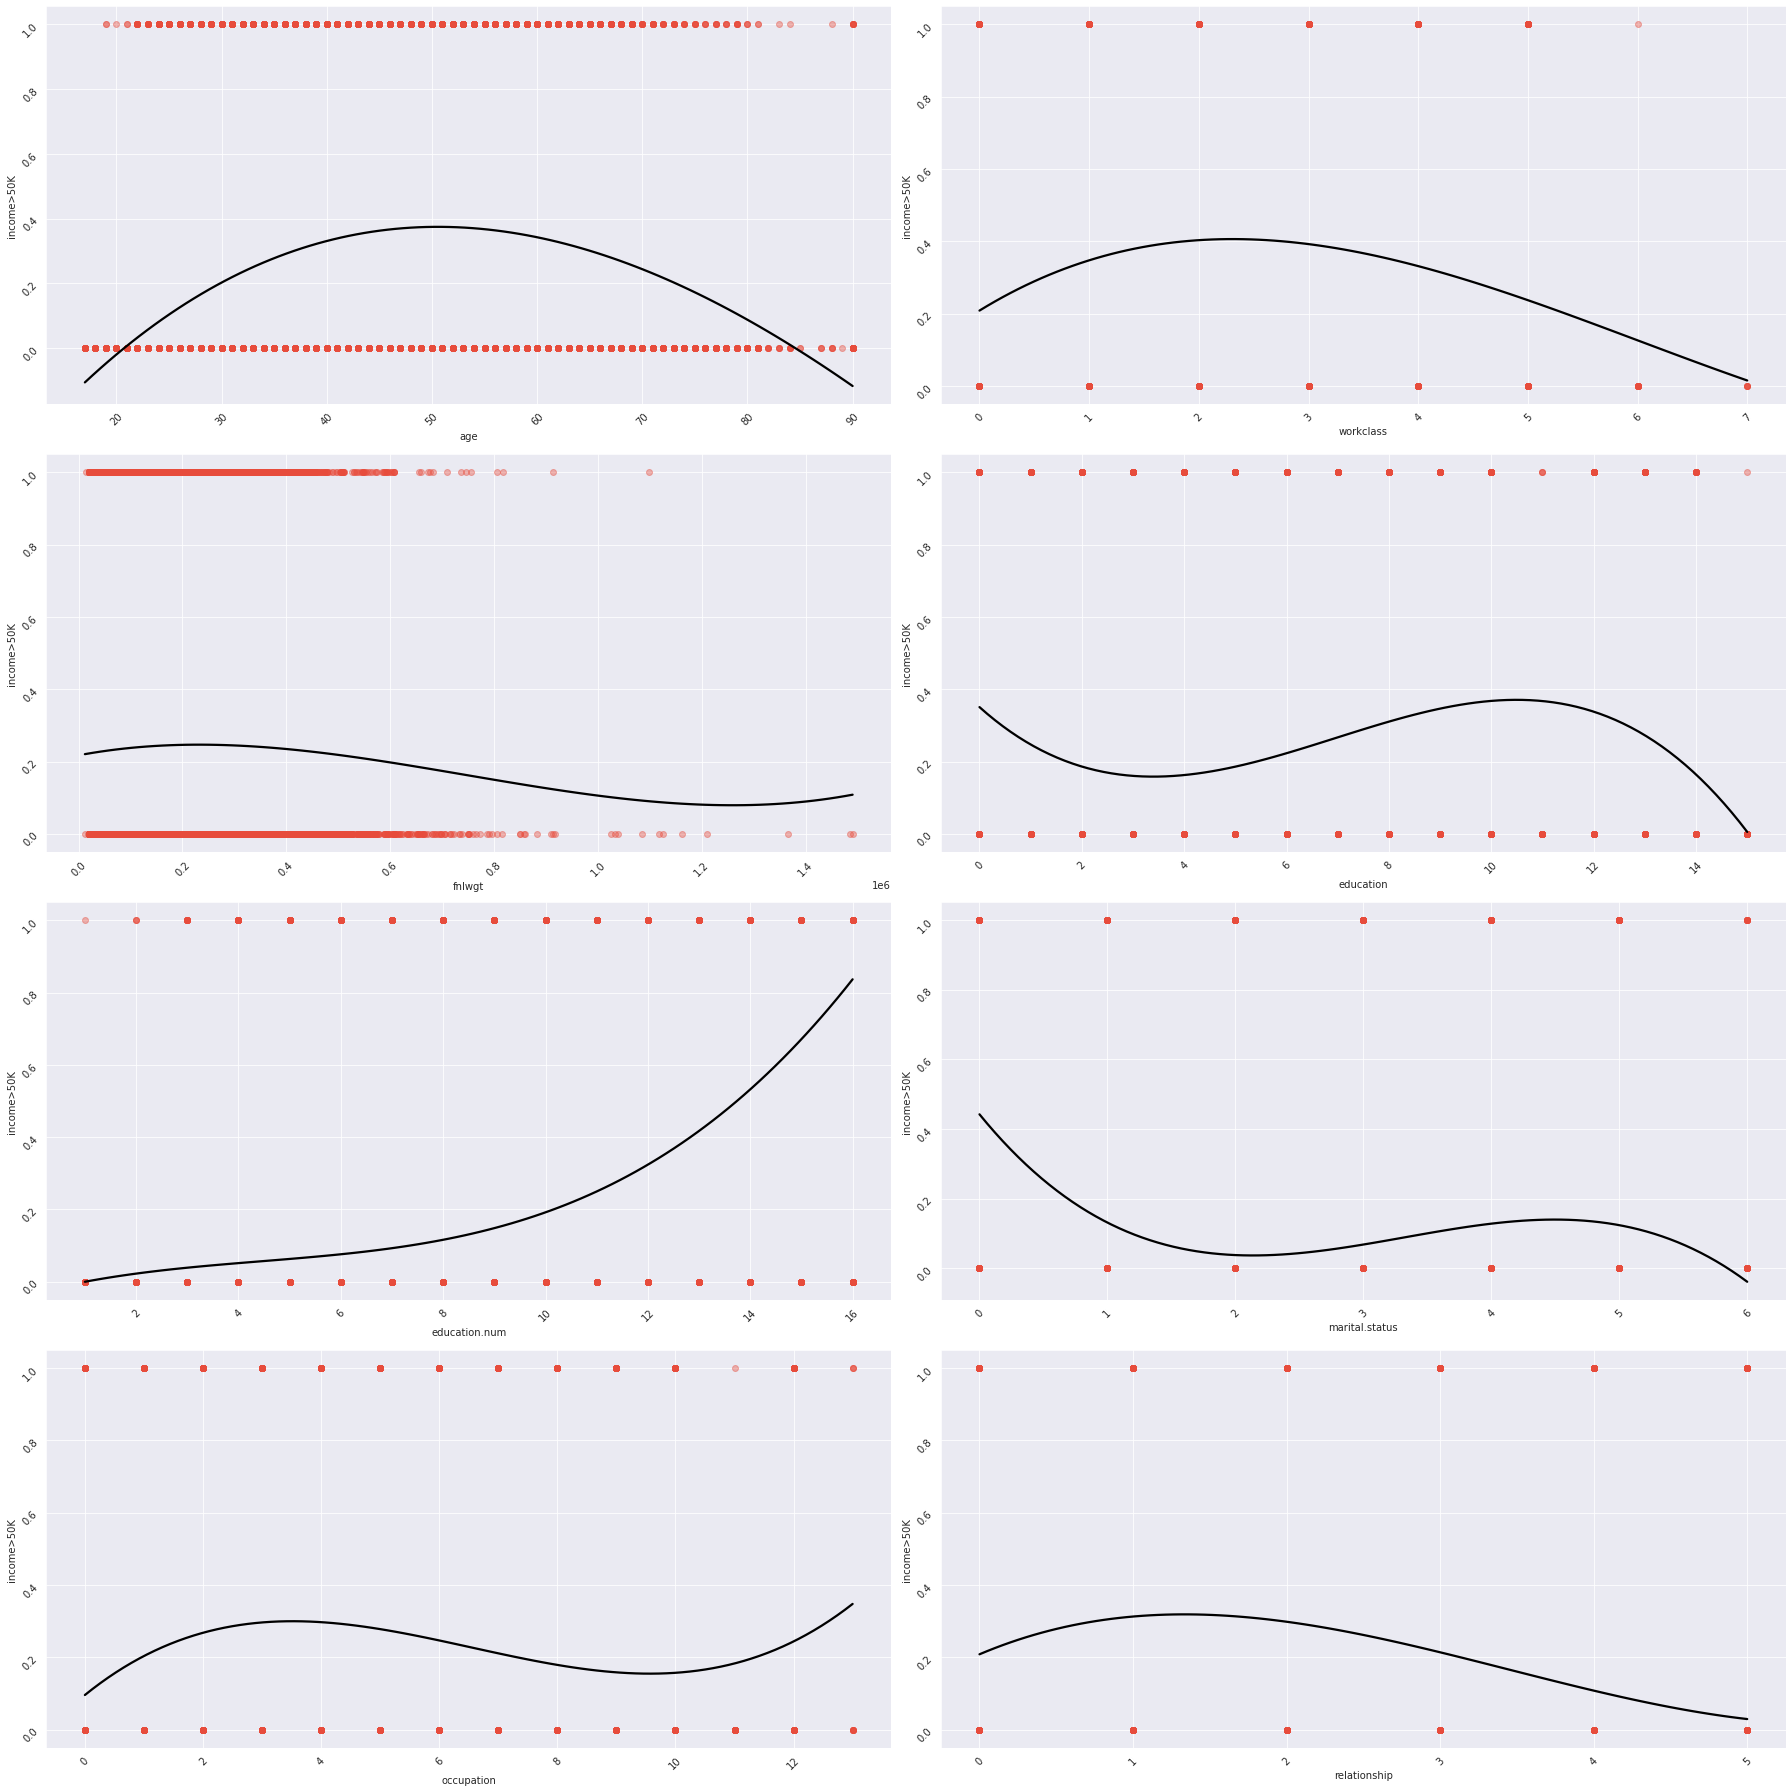

In [97]:
def srt_reg(y, df):
    fig, axes = plt.subplots(4, 2, figsize=(25, 25))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['number']).columns, axes):

        sns.regplot(x=i,
                    y=y,
                    data=df,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        # j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()
        
srt_reg(label, train_data)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


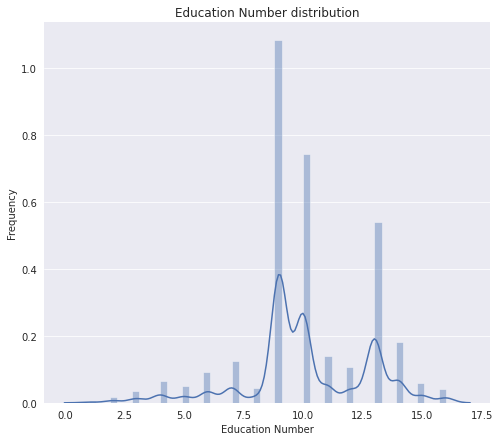

In [98]:
sns.set_style("darkgrid")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train_data['education.num'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Education Number")
ax.set(title="Education Number distribution")
sns.despine(trim=True, left=True)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


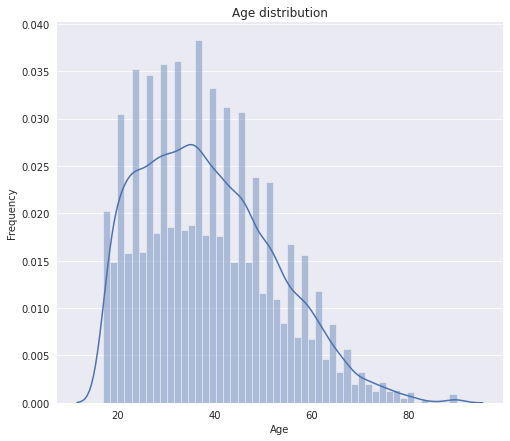

In [99]:
sns.set_style("darkgrid")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train_data['age'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Age")
ax.set(title="Age distribution")
sns.despine(trim=True, left=True)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


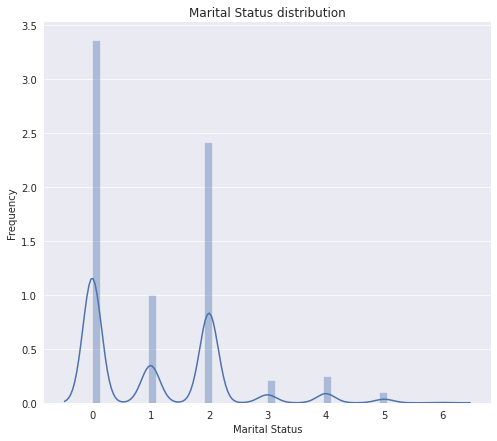

In [100]:
sns.set_style("darkgrid")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train_data['marital.status'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Marital Status")
ax.set(title="Marital Status distribution")
sns.despine(trim=True, left=True)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


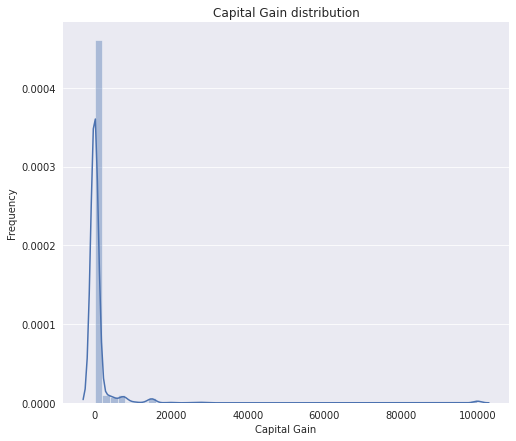

In [101]:
sns.set_style("darkgrid")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train_data['capital.gain'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Capital Gain")
ax.set(title="Capital Gain distribution")
sns.despine(trim=True, left=True)
plt.show()

<AxesSubplot:>

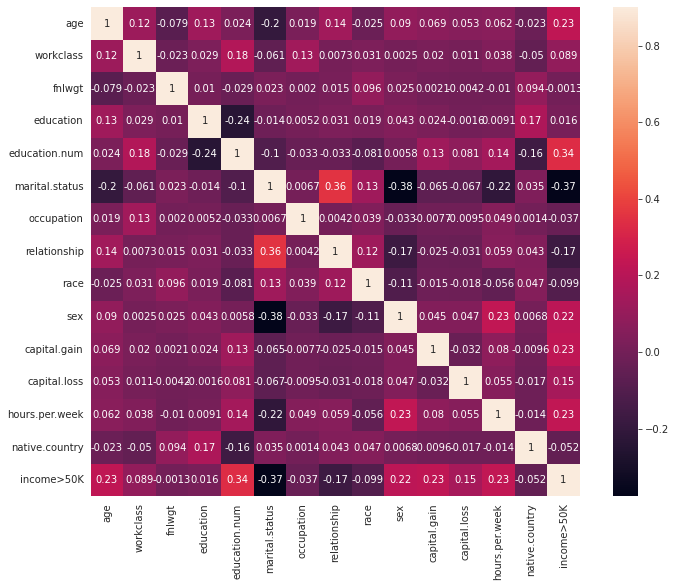

In [102]:
corrmat = train_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

In [103]:
low_correlation_columns = [
    "fnlwgt" , "education", "occupation", # "workclass", "native.country", "race"
]


all_data.drop(low_correlation_columns, axis=1, inplace=True)
train_data.drop(low_correlation_columns, axis=1, inplace=True)

In [104]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
capital.gain,11.894294
capital.loss,4.569669
native.country,4.212487
race,2.446035
workclass,1.972086
marital.status,0.911471
age,0.557563
relationship,0.526261
hours.per.week,0.238742
education.num,-0.316515


In [105]:
from scipy.special import boxcox1p
lam = 0.2
all_data["capital.gain"] = boxcox1p(all_data["capital.gain"], lam)
all_data["capital.loss"] = boxcox1p(all_data["capital.loss"], lam)
all_data["native.country"] = boxcox1p(all_data["native.country"], lam)
all_data["race"] = boxcox1p(all_data["race"], lam)

In [106]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
capital.loss,4.318006
capital.gain,3.502751
native.country,3.378382
race,2.312547
workclass,1.972086
marital.status,0.911471
age,0.557563
relationship,0.526261
hours.per.week,0.238742
education.num,-0.316515


In [107]:
int_columns = [
    "age", "capital.gain", "capital.loss"
]
for column in int_columns:
    all_data[column] = MinMaxScaler().fit_transform(np.array(all_data[column]).reshape(-1,1))
    train_data[column] = MinMaxScaler().fit_transform(np.array(train_data[column]).reshape(-1,1))

In [109]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [110]:
pos_train = train_data[train_data[label]==0]
pos_train = pos_train.sample(6016)
pos_train_labels = pos_train[label]
pos_train.drop([label], axis=1, inplace=True)


neg_train = train_data[train_data[label]==1]
# resample(neg_train,random_state=42,n_samples=18048,replace=True)
neg_train_labels = neg_train[label]
neg_train.drop([label], axis=1, inplace=True)

train = pd.concat((pos_train, neg_train)).reset_index(drop=True)
train_labels = pd.concat((pos_train_labels, neg_train_labels)).reset_index(drop=True)


# string_categorical_columns = [
#     "workclass", "education", "marital.status", "occupation", "relationship",
#     "race", "sex", "native.country"
# ]
# missing_value_columns = [
#     "workclass", "occupation", "native.country"
# ]
# values = {
#     "workclass": ["?", "Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", "Local-gov", "State-gov", "Without-pay", "Never-worked"],
#     "education": ["Bachelors", "Some-college", "11th", "HS-grad", "Prof-school", "Assoc-acdm", "Assoc-voc", "9th", "7th-8th", "12th", "Masters", "1st-4th", "10th", "Doctorate", "5th-6th", "Preschool"],
#     "marital.status": ["Married-civ-spouse", "Divorced", "Never-married", "Separated", "Widowed", "Married-spouse-absent", "Married-AF-spouse"],
#     "occupation": ["?","Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct", "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv", "Armed-Forces"],
#     "relationship": ["Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", "Unmarried"],
#     "race": ["White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other", "Black"],
#     "sex": ["Female", "Male"],
#     "native.country": ["?", "United-States", "Cambodia", "England", "Puerto-Rico", "Canada", "Germany", "Outlying-US(Guam-USVI-etc)", "India", "Japan", "Greece", "South", "China", "Cuba", "Iran", "Honduras", "Philippines", "Italy", "Poland", "Jamaica", "Vietnam", "Mexico", "Portugal", "Ireland", "France", "Dominican-Republic", "Laos", "Ecuador", "Taiwan", "Haiti", "Columbia", "Hungary", "Guatemala", "Nicaragua", "Scotland", "Thailand", "Yugoslavia", "El-Salvador", "Trinadad&Tobago", "Peru", "Hong", "Holand-Netherlands"]
# }

# for column in string_categorical_columns:
#     train[column] = train[column].apply(lambda row: values[column].index(row)).astype(float)
    
# train.astype(float)
train

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,workclass,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.095890,0.0,9,2.0,3.0,0.0,1.0,0.00000,0.000000,40,0.0
1,0.109589,0.0,13,2.0,3.0,0.0,0.0,0.00000,0.000000,40,0.0
2,0.013699,0.0,7,2.0,1.0,0.0,0.0,0.00000,0.000000,24,0.0
3,0.082192,0.0,9,2.0,3.0,0.0,0.0,0.00000,0.000000,40,4.0
4,0.356164,0.0,10,0.0,2.0,0.0,1.0,0.00000,0.000000,40,0.0
...,...,...,...,...,...,...,...,...,...,...,...
12027,0.287671,0.0,9,0.0,0.0,0.0,0.0,0.00000,0.433196,10,0.0
12028,0.164384,0.0,13,0.0,2.0,0.0,1.0,0.00000,0.000000,40,0.0
12029,0.424658,2.0,9,0.0,2.0,0.0,1.0,0.00000,0.000000,60,0.0
12030,0.438356,0.0,9,0.0,2.0,0.0,1.0,0.00000,0.000000,52,0.0


In [359]:
assert len(test) == len(test_ids)

DL

In [111]:
from keras.utils.np_utils import to_categorical 
# split train_df into train data and validation data for the fitting
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf


In [112]:
train_target = to_categorical(train_labels, num_classes=2)

In [113]:
from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(train_target, axis=1)                 
class_weights = compute_class_weight(class_weight = 'balanced', 
                                     classes = np.unique(y_integers), 
                                     y = y_integers)
d_class_weights = dict(enumerate(class_weights))

In [114]:
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.2,\
                                                   random_state=156, stratify=train_labels, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9625, 11)
(2407, 11)
(9625,)
(2407,)


In [115]:
print(train_labels.tolist().count(0), train_labels.tolist().count(1))

6016 6016


In [116]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    # keras.layers.Dense(30, activation='relu', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(160, activation='relu', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(80, activation='relu', kernel_initializer='glorot_uniform'),
    # keras.layers.AlphaDropout(rate=0.5),
    keras.layers.Dense(40, activation='relu', kernel_initializer='glorot_uniform'),
    keras.layers.AlphaDropout(rate=0.50),
    keras.layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')
])

In [117]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = np.math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    print('proper_rate:',min(rates))

In [118]:
batch_size=32
n_epochs=30

In [119]:
# class is identical so we use categorical_crossentropy
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=1e-3),
              loss='binary_crossentropy', metrics=["accuracy"])

301/301 [==============================] - 2s 4ms/step - loss: 7.3346 - accuracy: 0.5045
proper_rate: 1e-05


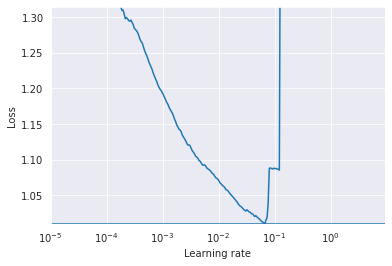

In [120]:
rates, losses = find_learning_rate(model, X_train, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [121]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    batch_size=batch_size, 
                    epochs=n_epochs, 
                    # class_weight=d_class_weights,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15)])

Epoch 1/30
301/301 [==============================] - 2s 5ms/step - loss: 0.7524 - accuracy: 0.5884 - val_loss: 0.5856 - val_accuracy: 0.7769
Epoch 2/30
301/301 [==============================] - 1s 5ms/step - loss: 0.6312 - accuracy: 0.6849 - val_loss: 0.6461 - val_accuracy: 0.7765
Epoch 3/30
301/301 [==============================] - 1s 4ms/step - loss: 0.6006 - accuracy: 0.6999 - val_loss: 0.7476 - val_accuracy: 0.7603
Epoch 4/30
301/301 [==============================] - 1s 4ms/step - loss: 0.5643 - accuracy: 0.7303 - val_loss: 0.6163 - val_accuracy: 0.7860
Epoch 5/30
301/301 [==============================] - 1s 5ms/step - loss: 0.5517 - accuracy: 0.7308 - val_loss: 0.5846 - val_accuracy: 0.7898
Epoch 6/30
301/301 [==============================] - 1s 4ms/step - loss: 0.5184 - accuracy: 0.7532 - val_loss: 0.6031 - val_accuracy: 0.7919
Epoch 7/30
301/301 [==============================] - 1s 4ms/step - loss: 0.5071 - accuracy: 0.7582 - val_loss: 0.5263 - val_accuracy: 0.7923
Epoch 

In [ ]:
d_class_weights

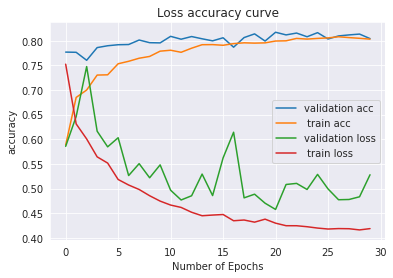

In [122]:
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.plot(history.history['accuracy'], label=' train acc')
plt.plot(history.history['val_loss'], label='validation loss')
plt.plot(history.history['loss'], label=' train loss')
plt.title('Loss accuracy curve')
plt.xlabel("Number of Epochs")
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [123]:
results = model.predict(test)
print(results)
# select index with the maximum probability
# results = np.argmax(results,axis = 1)
preds = [1 if result > 0.5  else 0 for result in results]
# print(preds)

[[3.2074896e-01]
 [1.8078541e-05]
 [2.0905547e-01]
 ...
 [9.9999940e-01]
 [2.5668405e-02]
 [9.9998808e-01]]


In [124]:
my_submission = pd.DataFrame({'ID': test_ids,
                             'Prediction': preds})
my_submission.to_csv('/kaggle/working/submission_dl_down.csv', index=False)

ML

In [335]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [364]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [365]:
predictions = logisticRegr.predict(X_test)
predictions.tolist().count(0)

4181

In [366]:
predictions = logisticRegr.predict(test)
predictions.tolist().count(0)

19740

In [101]:
predictions = logisticRegr.predict(test)
predictions.tolist().count(0)

15009

In [ ]:
predictions

In [61]:
# svm.fit(X_train, y_train)
# predictions = svm.predict(X_test)
# predictions.tolist().count(0)

2215

submit

In [367]:
my_submission = pd.DataFrame({'ID': test_ids,
                             'Prediction': predictions})
my_submission.to_csv('/kaggle/working/submission_log_reg_upsample.csv', index=False)

# CV

In [368]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [300]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range = (0,1))

# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [374]:
# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , LogisticRegression())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
#     {'classifier' : [RandomForestClassifier()],
#     'classifier__n_estimators' : list(range(10,101,10)),
#     }
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


In [375]:
best_clf

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(C=3792.690190732246,
                                                            solver='liblinear')],
                          'classifier__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear']}],
             verbose=True)

In [376]:
predictions = best_clf.predict(X_test)
predictions.tolist().count(0)

4120

In [377]:
predictions = best_clf.predict(test)
predictions.tolist().count(0)

19588

In [378]:
my_submission = pd.DataFrame({'ID': test_ids,
                             'Prediction': predictions})
my_submission.to_csv('/kaggle/working/submission_ensemble_upsample_log_reg.csv', index=False)